<a href="https://colab.research.google.com/github/Dhamu785/AI-scratch/blob/main/TensorFlow/05_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading data**

In [ ]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
len(x_train), len(y_train), len(x_test), len(y_test)

(60000, 60000, 10000, 10000)

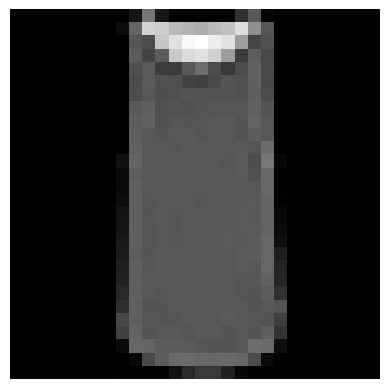

In [ ]:
plt.axis('off')
plt.imshow(x_train[2], cmap='gray')
plt.show()

In [ ]:
pd.value_counts(y_train)

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

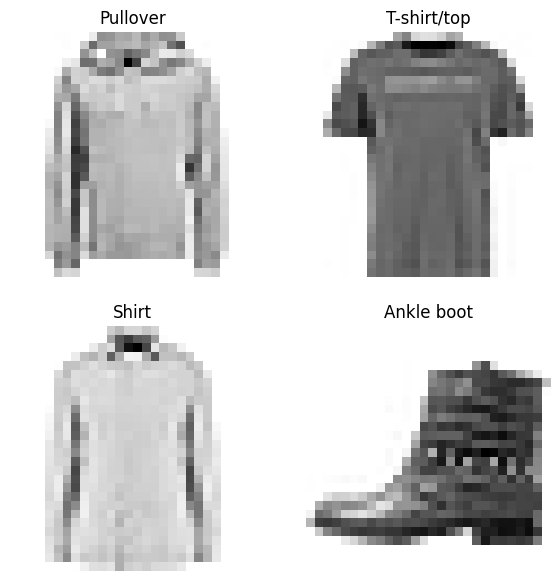

In [ ]:
import random

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(7, 7))
for i in range(4):
  plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## **Model building**

In [ ]:
# Testing.....

flaten = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])

flaten.output_shape

# Therefore, after flattening it return the output shape as 28x28

(None, 784)

In [ ]:
# Label is not one hot encoded

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='ReLU'),
    tf.keras.layers.Dense(5, activation='ReLU'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

history_1 = model_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 8ms/step - loss: 2.3459 - sparse_categorical_accuracy: 0.1010 - val_loss: 2.3032 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3042 - sparse_categorical_accuracy: 0.0985 - val_loss: 2.3032 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3039 - sparse_categorical_accuracy: 0.1003 - val_loss: 2.3032 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3041 - sparse_categorical_accuracy: 0.0990 - val_loss: 2.3043 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3041 - sparse_categorical_accuracy: 0.0986 - val_loss: 2.3032 - val_sparse_categorical_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3039 -

In [ ]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 2.3039 - sparse_categorical_accuracy: 0.1000


[2.3038811683654785, 0.10000000149011612]

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Label is one hot encoded

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='ReLU'),
    tf.keras.layers.Dense(5, activation='ReLU'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = [tf.keras.metrics.CategoricalAccuracy()])

history_2 = model_2.fit(tf.constant(x_train), tf.one_hot(y_train, depth=10), epochs=10, validation_data=(x_test, tf.one_hot(y_test, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 2.3917 - categorical_accuracy: 0.0983 - val_loss: 2.3035 - val_categorical_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3040 - categorical_accuracy: 0.0987 - val_loss: 2.3039 - val_categorical_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3041 - categorical_accuracy: 0.0972 - val_loss: 2.3033 - val_categorical_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3039 - categorical_accuracy: 0.1007 - val_loss: 2.3039 - val_categorical_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3040 - categorical_accuracy: 0.1006 - val_loss: 2.3034 - val_categorical_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3039 - categorical_accuracy: 0.1007 - val_loss: 2.3032 - val_categorical_acc

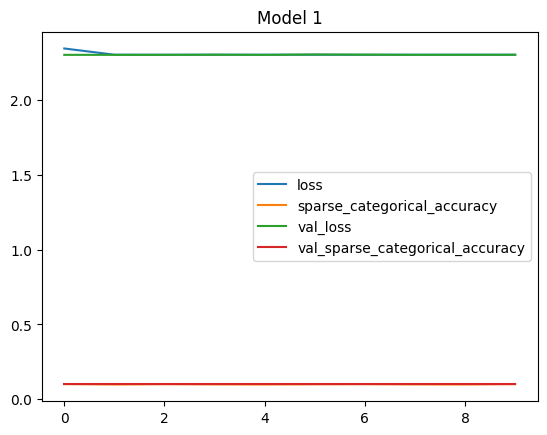

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.title("Model 1")
plt.show()

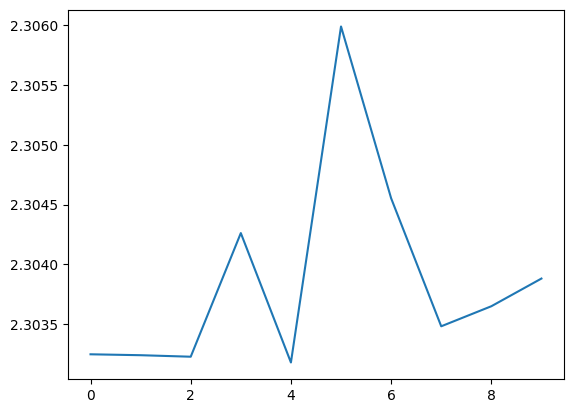

In [ ]:
plt.plot(history_1.history['val_loss'])
plt.show()

## **Model improvenment**
- It is required when the trained model is not performng well.
- In my case it is not performed well.
- Make hands dirty.

In [ ]:
x_train[1].min(), x_train[1].max()

(0, 255)

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

x_train_scaled[0].min(), x_train_scaled[0].max()

(0.0, 1.0)

In [ ]:
# Label is one hot encoded

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='ReLU'),
    tf.keras.layers.Dense(5, activation='ReLU'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = [tf.keras.metrics.CategoricalAccuracy()])

history_3 = model_3.fit(tf.constant(x_train_scaled),
                        tf.one_hot(y_train, depth=10), epochs=10,
                        validation_data=(tf.constant(x_test_scaled), tf.one_hot(y_test, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.7538 - categorical_accuracy: 0.7219 - val_loss: 0.6359 - val_categorical_accuracy: 0.7630
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6124 - categorical_accuracy: 0.7735 - val_loss: 0.6167 - val_categorical_accuracy: 0.7715
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5851 - categorical_accuracy: 0.7833 - val_loss: 0.6611 - val_categorical_accuracy: 0.7625
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5778 - categorical_accuracy: 0.7850 - val_loss: 0.5973 - val_categorical_accuracy: 0.7840
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5629 - categorical_accuracy: 0.7900 - val_loss: 0.5973 - val_categorical_accuracy: 0.7845
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5596 - categorical_accuracy: 0.7909 - val_loss: 0.6057 - val_categorical_acc

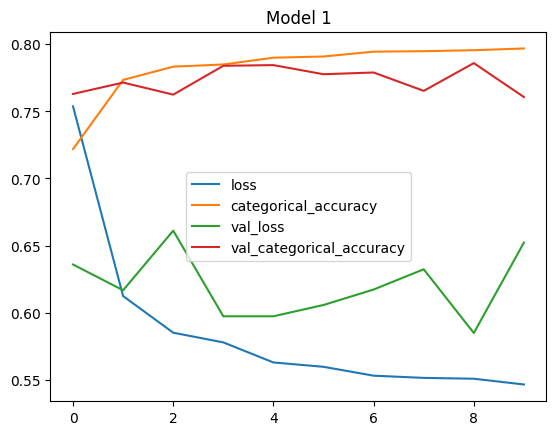

In [ ]:
pd.DataFrame(history_3.history).plot()
plt.title("Model 1")
plt.show()

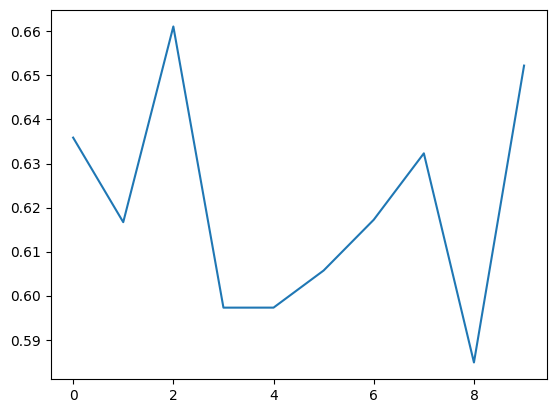

In [ ]:
plt.plot(history_3.history['val_loss'])
plt.show()

## **Let's find out the learning rate**

In [20]:
# Label is one hot encoded

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='ReLU'),
    tf.keras.layers.Dense(5, activation='ReLU'),
    tf.keras.layers.Dense(10, activation='softmax')
])

learnings = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = [tf.keras.metrics.CategoricalAccuracy()])

history_4 = model_4.fit(tf.constant(x_train_scaled), tf.one_hot(y_train, depth=10), epochs=50,
                        validation_data=(tf.constant(x_test_scaled), tf.one_hot(y_test, depth=10)),
                        callbacks = [learnings], batch_size=10)

Epoch 1/100
6000/6000 [==============================] - 47s 8ms/step - loss: 0.7101 - categorical_accuracy: 0.7534 - val_loss: 0.5852 - val_categorical_accuracy: 0.8103 - lr: 0.0010
Epoch 2/100
6000/6000 [==============================] - 47s 8ms/step - loss: 0.5175 - categorical_accuracy: 0.8250 - val_loss: 0.5667 - val_categorical_accuracy: 0.8107 - lr: 0.0011
Epoch 3/100
6000/6000 [==============================] - 45s 8ms/step - loss: 0.4844 - categorical_accuracy: 0.8356 - val_loss: 0.5124 - val_categorical_accuracy: 0.8299 - lr: 0.0013
Epoch 4/100
6000/6000 [==============================] - 44s 7ms/step - loss: 0.4652 - categorical_accuracy: 0.8414 - val_loss: 0.5222 - val_categorical_accuracy: 0.8272 - lr: 0.0014
Epoch 5/100
6000/6000 [==============================] - 45s 8ms/step - loss: 0.4532 - categorical_accuracy: 0.8453 - val_loss: 0.5212 - val_categorical_accuracy: 0.8293 - lr: 0.0016
Epoch 6/100
6000/6000 [==============================] - 47s 8ms/step - loss: 0.4432 

In [23]:
history_4.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])

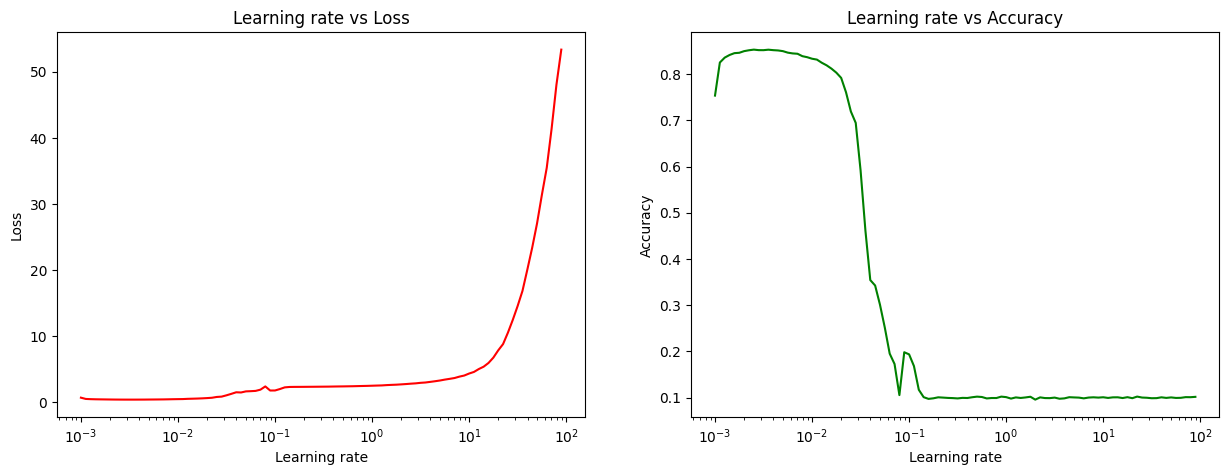

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.semilogx(history_4.history['lr'], history_4.history['loss'], 'r')
plt.title("Learning rate vs Loss")
plt.xlabel("Learning rate")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.semilogx(history_4.history['lr'], history_4.history['categorical_accuracy'], 'g')
plt.title("Learning rate vs Accuracy")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")

plt.show()


## **Build model from the previous learning rate**

In [67]:
# Lets train the model with the above learning rate

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='ReLU'),
    tf.keras.layers.Dense(5, activation='ReLU'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# learnings = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0018),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = [tf.keras.metrics.CategoricalAccuracy()])

history_5 = model_5.fit(tf.constant(x_train_scaled), tf.one_hot(y_train, depth=10), epochs=10,
                        validation_data=(tf.constant(x_test_scaled), tf.one_hot(y_test, depth=10)),
                        batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 55s 9ms/step - loss: 0.7127 - categorical_accuracy: 0.7470 - val_loss: 0.5478 - val_categorical_accuracy: 0.8100
Epoch 2/10
6000/6000 [==============================] - 58s 10ms/step - loss: 0.5190 - categorical_accuracy: 0.8211 - val_loss: 0.5349 - val_categorical_accuracy: 0.8181
Epoch 3/10
6000/6000 [==============================] - 55s 9ms/step - loss: 0.4918 - categorical_accuracy: 0.8288 - val_loss: 0.5176 - val_categorical_accuracy: 0.8176
Epoch 4/10
6000/6000 [==============================] - 51s 9ms/step - loss: 0.4770 - categorical_accuracy: 0.8325 - val_loss: 0.5013 - val_categorical_accuracy: 0.8244
Epoch 5/10
6000/6000 [==============================] - 56s 9ms/step - loss: 0.4635 - categorical_accuracy: 0.8369 - val_loss: 0.5011 - val_categorical_accuracy: 0.8209
Epoch 6/10
6000/6000 [==============================] - 55s 9ms/step - loss: 0.4559 - categorical_accuracy: 0.8381 - val_loss: 0.5067 - val_categorical_ac

## **Predictions**

In [68]:
y_predict_5 = model_5.predict(x_test_scaled)

313/313 [==============================] - 2s 5ms/step


In [69]:
# To find the maximum value in the tensor

print("Prediction:\t", y_predict_5[1], "\n")
# print()
print("Type 1:\t", y_predict_5[1].max())
print("Type 2:\t", tf.reduce_max(y_predict_5[1]).numpy())

Prediction:	 [1.6665911e-04 3.6946401e-09 9.1205305e-01 4.4036938e-06 1.1435792e-02
 0.0000000e+00 7.6321878e-02 0.0000000e+00 1.8116236e-05 1.0838087e-23] 

Type 1:	 0.91205305
Type 2:	 0.91205305


In [70]:
y_pres_5 = y_predict_5.argmax(axis=1)

y_pres_5[:4], y_test[:4]

(array([9, 2, 1, 1]), array([9, 2, 1, 1], dtype=uint8))

## **Evaluation**

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
model_5.evaluate(x_test_scaled, tf.one_hot(y_test, depth=10))

313/313 [==============================] - 1s 3ms/step - loss: 0.4717 - categorical_accuracy: 0.8339


[0.47172847390174866, 0.833899974822998]

In [86]:
c_m = confusion_matrix(y_test, y_pres_5)

c_m

array([[811,  10,  13,  58,   4,   0,  95,   0,   9,   0],
       [  0, 961,   8,  23,   4,   0,   3,   0,   1,   0],
       [ 29,  13, 690,   9, 157,   1,  97,   0,   4,   0],
       [ 44,  40,   8, 805,  36,   0,  65,   0,   2,   0],
       [  3,   5,  93,  27, 768,   0, 100,   0,   4,   0],
       [  1,   0,   0,   0,   0, 926,   0,  50,   2,  21],
       [163,   6, 112,  36, 105,   0, 559,   0,  19,   0],
       [  0,   0,   0,   0,   0,  23,   0, 957,   0,  20],
       [  4,   0,   7,   5,   3,  15,  19,   7, 940,   0],
       [  1,   0,   0,   0,   0,  13,   0,  63,   1, 922]])

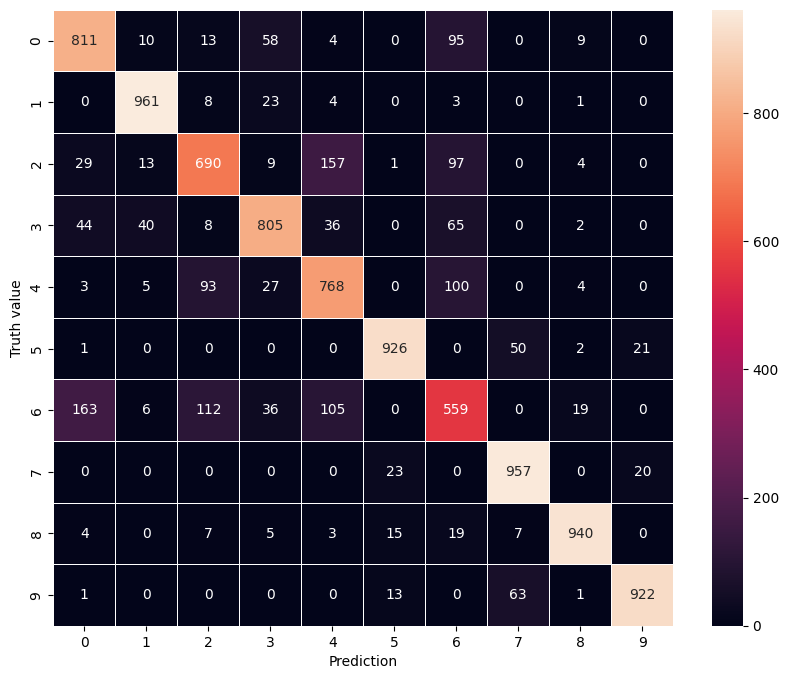

In [87]:
plt.figure(figsize=(10,8))
sns.heatmap(c_m, annot=True, fmt='.3g', linewidth=.5)
plt.ylabel("Truth value")
plt.xlabel("Prediction")
plt.show()

In [90]:
pd.value_counts(y_test)

9    1000
2    1000
1    1000
6    1000
4    1000
5    1000
7    1000
3    1000
8    1000
0    1000
dtype: int64

In [92]:
for i,j in enumerate(class_names):
    print(i,j)

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


## **Application**

In [107]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:.2f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 1s 880ms/step


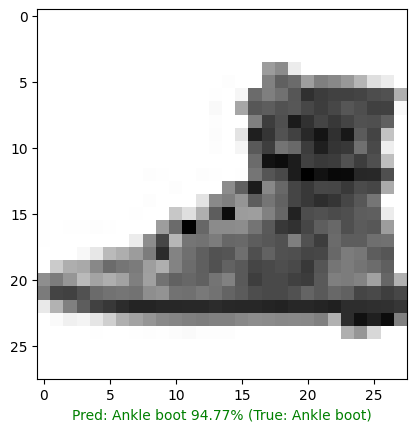

In [108]:
plot_random_image(model=model_5,
                  images=x_test_scaled,
                  true_labels=y_test,
                  classes=class_names)

## **Pattern learning**

In [113]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 dense_16 (Dense)            (None, 5)                 55        
                                                                 
 dense_17 (Dense)            (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model_5.layers

In [110]:
model_5.layers[1]

In [111]:
weights, bias = model_5.layers[1].get_weights()

weights, bias

(array([[ 0.12258964, -0.27622077, -0.03857463, ...,  0.07749013,
          0.9143598 , -0.16024368],
        [-1.1455163 , -0.48567167, -0.02281948, ..., -0.00246288,
          1.1267093 ,  0.19237213],
        [-0.61321855,  0.6504586 ,  0.02532168, ...,  0.02395985,
          0.9906732 , -0.5070088 ],
        ...,
        [-0.9455313 ,  0.04962372,  0.0045528 , ..., -0.07394532,
          0.9220059 ,  0.24496594],
        [-1.2048366 , -0.7879956 , -0.04121798, ...,  0.08420403,
          0.53026646,  1.5590067 ],
        [-0.91333425,  0.42883223,  0.0514764 , ..., -0.03799687,
          0.20390277,  0.26594687]], dtype=float32),
 array([ 0.6165026 ,  0.2991985 , -0.06517678,  1.7539716 , -0.01925186,
         1.7247783 ,  0.58449   , -0.03974144,  1.291744  ,  0.14919537],
       dtype=float32))

In [112]:
weights.shape, bias.shape

((784, 10), (10,))

In [114]:
from tensorflow.keras.utils import plot_model

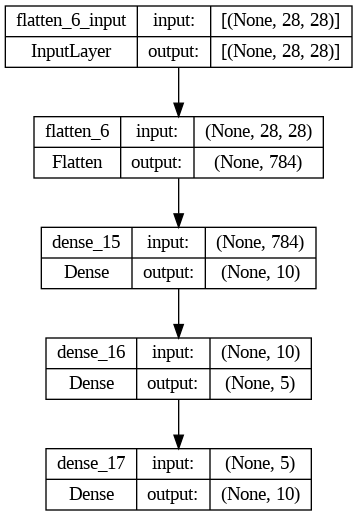

In [116]:
plot_model(model_5, show_shapes=True)